#Bài tập

1. Hãy dùng bộ pre-train glove.6b.100 huấn luyện mô hình LSTM như sau:

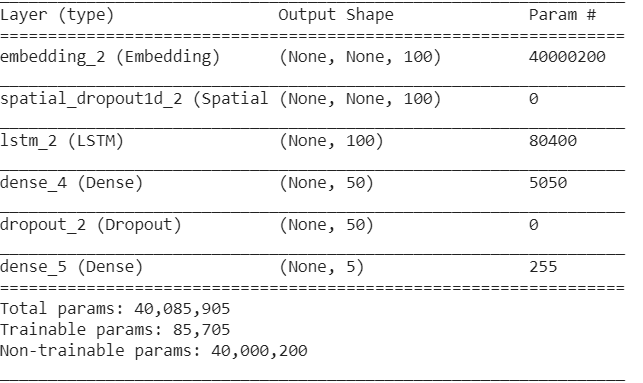

Tính độ chính xác trên tập testing (chia tập training thành training và validation)

2. Thay LSTM trong mô hình trên bằng GRU. So sánh thời gian, độ chính xác và đưa ra nhận xét. 

3.tìm hiểu Convolution1D và mô hình sau:

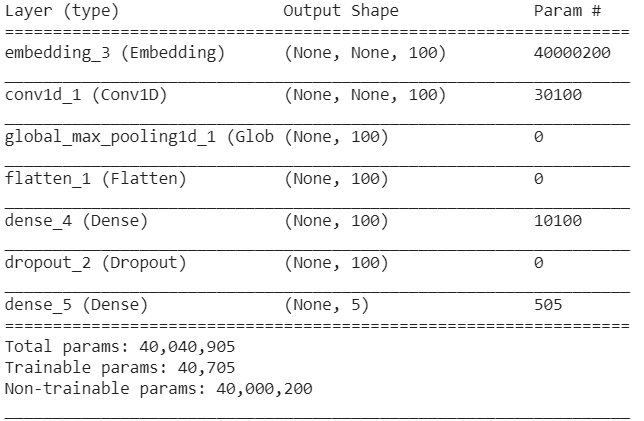

In [ ]:
import keras
import pandas as pd
import numpy as np


In [ ]:
#Thư viện
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_train=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/AML/main/lab-05/train.tsv", sep="\t")
df_test=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/AML/main/lab-05/train.tsv", sep="\t")

In [ ]:
df_test

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
print("các labels: ",df_train.Sentiment.unique())

các labels:  [1 2 3 4 0]


#Pre-processing

In [ ]:
#làm sạch dữ liệu
replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}
def clean_text(text):
    text = text.lower()
    for s in replace_list:
        text = text.replace(s, replace_list[s])
    text = ' '.join(text.split())
    return text

In [ ]:
data_train=list(df_train.Phrase.map(clean_text))
data_test=list(df_test.Phrase.map(clean_text))

In [ ]:
print("In thử xem \n",data_train[0:5])

In thử xem 
 ['a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .', 'a series of escapades demonstrating the adage that what is good for the goose', 'a series', 'a', 'series']


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-11-15 18:04:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-15 18:04:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-15 18:04:04--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
! unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
